<a href="https://colab.research.google.com/github/nagabathula/cmpe257/blob/main/assignment2/CC_Data_fractal_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

In [21]:
cc = pd.read_csv('/content/gdrive/MyDrive/257-sem2/Datasets/CC_GENERAL.csv')
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [22]:
cc.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [23]:
mean_value=cc['CREDIT_LIMIT'].mean()
cc['CREDIT_LIMIT']=cc['CREDIT_LIMIT'].fillna(mean_value)

In [24]:
mean_value=cc['MINIMUM_PAYMENTS'].mean()
cc['MINIMUM_PAYMENTS']=cc['MINIMUM_PAYMENTS'].fillna(mean_value)

In [25]:

cc.rename(columns = {col:col.lower() for col in cc.columns.values},inplace=True)

In [26]:
cust = cc.cust_id
cc.drop(columns = ['cust_id'],inplace=True)

In [27]:
cc[cc.columns[cc.isna().any()]].isna().sum().to_frame().T

""
0


In [28]:
cc.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [29]:
from sklearn.preprocessing import StandardScaler
X = cc.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet



array([[-0.24943448, -0.42489974, -0.35693402, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.13432467, -0.46955188, -0.35693402, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.51808382, -0.10766823,  0.10888851, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.18547673, -0.40196519, -0.35693402, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.18547673, -0.46955188, -0.35693402, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.88903307,  0.04214581,  0.30173158, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [30]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn import preprocessing as pp
from sklearn.cluster import KMeans
import random
import pylab as pl
%matplotlib inline

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6,random_state=0)
kmeans.fit(cc)

KMeans(n_clusters=6, random_state=0)

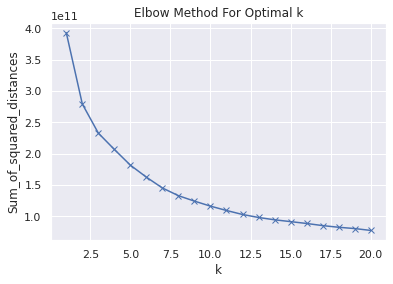

In [32]:
Sum_of_squared_distances = []
K = range(1,21)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cc)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [33]:
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range(2,21):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(cc)
    centers = km.cluster_centers_

    score = silhouette_score(cc, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.511639269641848
For n_clusters = 3, silhouette score is 0.4676551448676235
For n_clusters = 4, silhouette score is 0.4657118789980141
For n_clusters = 5, silhouette score is 0.37854107966520756
For n_clusters = 6, silhouette score is 0.3727610992344785
For n_clusters = 7, silhouette score is 0.3693786711669841
For n_clusters = 8, silhouette score is 0.3810266765306973
For n_clusters = 9, silhouette score is 0.35265269088929885
For n_clusters = 10, silhouette score is 0.36148099477817647
For n_clusters = 11, silhouette score is 0.35852228161956023
For n_clusters = 12, silhouette score is 0.3627583956265335
For n_clusters = 13, silhouette score is 0.2636692730366274
For n_clusters = 14, silhouette score is 0.2869259196985265
For n_clusters = 15, silhouette score is 0.28940123956741326
For n_clusters = 16, silhouette score is 0.2595348875429813
For n_clusters = 17, silhouette score is 0.24753954693160776
For n_clusters = 18, silhouette score is 0.

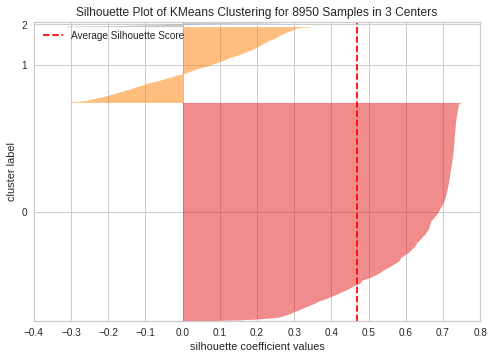

In [34]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
km = KMeans (n_clusters=3)
visualizer = SilhouetteVisualizer(km)

visualizer.fit(cc) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

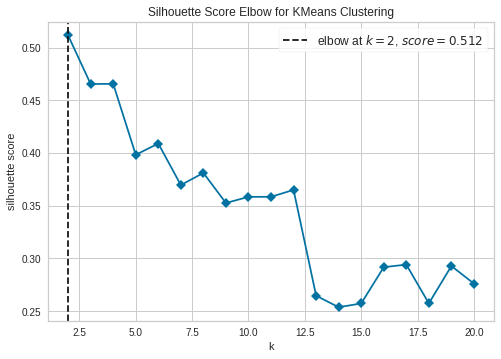

In [35]:
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
km = KMeans (n_clusters=3)
visualizer = KElbowVisualizer(
    km, k=(2,21),metric ='silhouette', timings=False
)

visualizer.fit(cc) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data